## Multi Layer Perceptron

### Creating here a 3-Layer MLP from scratch!

In [202]:
import numpy as np

In [203]:
#Model Parameters
input_size = 3
layers = [4,3] #no of neurons in the 1st and 2nd layers resp.
output_size = 2

In [204]:
def softmax(a):
    ea = np.exp(a) #returns a vector
    ans = ea/np.sum(ea,axis=1,keepdims=True)
    return ans

In [205]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {}
        
        #First Layers
        model['w1'] = np.random.randn(input_size,layers[0]) #creates a 3*4 matrix
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['w2'] = np.random.randn(layers[0],layers[1]) #creates a 4*3 matrix
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third Layer
        model['w3'] = np.random.randn(layers[1],output_size) #creates a 3*2 matrix
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
        
        w1,w2,w3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(x,w1) + b1
        a1 = np.tanh(z1) #tanh reduces the range in -1 to 1, like sigmoid does from 0 to 1
        
        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2) 
        
        z3 = np.dot(a2,w3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["w1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["w2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["w3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
    
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis = 1)
    
    def summary(self):
        w1,w2,w3 = self.model['w1'], self.model['w2'], self.model['w3']
        b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        a1,a2,y_ = self.activation_outputs
        
        print('W1 ',w1.shape)
        print('A1 ',a1.shape)
        
        print('W2 ',w2.shape)
        print('A2 ',a2.shape)
        
        print('W3 ',w3.shape)
        print('Y_ ',y_.shape)

In [206]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [207]:
def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
        
    return y_oht

In [208]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [209]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [210]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


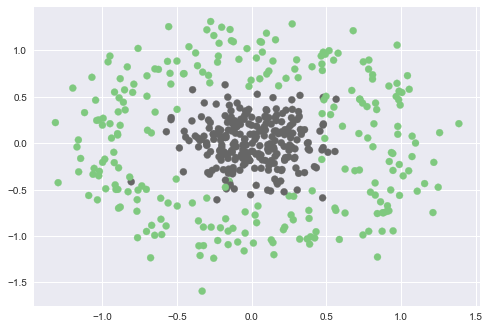

In [211]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [212]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [213]:
def train(x,y,model,epochs,lr,logs=True):
    training_loss = []
    classes = 2
    y_oht = one_hot(y,classes)
    
    for ix in range(epochs):
        y_ = model.forward(x)
        l = loss(y_oht,y_)
        training_loss.append(l)
        model.backward(x,y_oht,lr)
        if(logs):
            if(ix%50==0):
                print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [214]:
losses = train(X,Y,model,501,0.001)

Epoch 0 Loss 0.3571
Epoch 50 Loss 0.0711
Epoch 100 Loss 0.0542
Epoch 150 Loss 0.0484
Epoch 200 Loss 0.0454
Epoch 250 Loss 0.0436
Epoch 300 Loss 0.0423
Epoch 350 Loss 0.0413
Epoch 400 Loss 0.0406
Epoch 450 Loss 0.0399
Epoch 500 Loss 0.0394


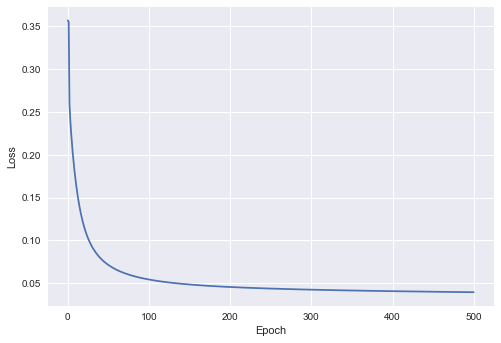

In [215]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [216]:
from visualize1 import plot_decision_boundary

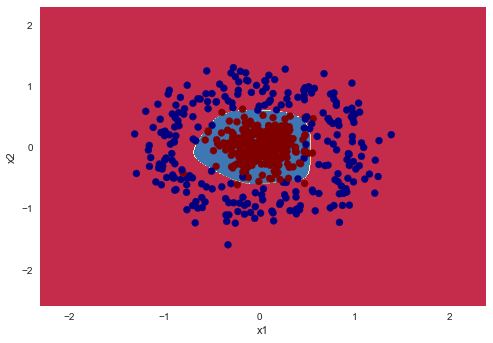

In [217]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [218]:
def accuracy(x,y):
    outputs = model.predict(x)
    acc = np.sum(outputs==y)/y.shape[0]
    return acc

In [219]:
training_accuracy = accuracy(X,Y)
print(training_accuracy)

0.97
